1. 가상의 학생 성적 데이터를 활용한 데이터 전처리 과정 구현해보세요.

2. 가상 데이터셋을 생성한 뒤, 데이터셋을 학습, 검증, 테스트 데이터셋으로 분할해보세요.

3. 간단한 이진 분류 문제를 k-최근접이웃 알고리즘을 사용해 해결해보세요.

—- 선택 —-
4. OR, NOT 연산을 모델링해보세요.

5. 논리연산 모델을 다 모아서 어떤 논리연산이라도 모델로 처리하는 AI 서버를 만들어보세요.

### 1번 문제 : 가상의 학생 성적 데이터를 활용한 데이터 전처리 과정 구현해보세요.

In [ ]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.preprocessing import LabelEncoder


# 나눔 폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# 런타임 재시작 후 실행
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

class MakeScores:
    # 학생 수, 과목 수 설정
    def __init__(self, num_students=100, num_subjects=5):
        self.num_students = num_students
        self.num_subjects = num_subjects

    def make_data(self):
        # 학생/과목 이름 생성
        names = ['학생' + str(i) for i in range(1, self.num_students + 1)]
        subjects = ['국어', '영어', '수학', '과학', '사회']

        # 데이터 생성 (0~100점 랜덤)
        data = np.random.randint(0, 101, size=(self.num_students, self.num_subjects))
        df = pd.DataFrame(data, columns=subjects, index=names)

        # 결측치/이상치 추가 (랜덤하게 10%/5%)
        for col in subjects:
            mask = np.random.rand(len(df)) < 0.1
            df.loc[mask, col] = np.nan
        for col in subjects:
            mask = np.random.rand(len(df)) < 0.05
            df.loc[mask, col] = np.random.randint(150, 201)

        # 학년, 성별 정보 추가
        df['학년'] = np.random.choice([1, 2, 3], size=self.num_students)
        df['성별'] = np.random.choice(['남', '여'], size=self.num_students)

        return df

    def preprocessing(df):
        # na값 처리
        df_mean = df.iloc[:, 0:5].mean().round(1)
        # print(df_mean)
        df.iloc[:, 0:5] = df.iloc[:, 0:5].fillna(df_mean)

        # 이상치 확인/처리(0과 100사이인지)
        mask = ((df.iloc[:, 0:5] >= 0) & (df.iloc[:, 0:5] <= 100)).all(axis=1)
        df = df[mask]

        # 성별 정보 라벨 인코딩
        le = LabelEncoder()
        df.loc[:,'성별'] = le.fit_transform(df['성별'])
        df['성별'] = df['성별'].astype(int)
        print(le.classes_) # 여 1, 남 0

        # 데이터 값 분포 시각화 : box plot
        plt.figure(figsize=(6, 3))
        sns.boxplot(data=df.iloc[:,0:5])
        plt.show()

        return df

In [ ]:
inst = MakeScores()
df = inst.make_data()
print(df.info())
# df

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 학생1 to 학생100
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   국어      94 non-null     float64
 1   영어      94 non-null     float64
 2   수학      91 non-null     float64
 3   과학      86 non-null     float64
 4   사회      88 non-null     float64
 5   학년      100 non-null    int64  
 6   성별      100 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 6.2+ KB
None


['남' '여']


<ipython-input-491-1b9c745d1711>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['성별'] = df['성별'].astype(int)


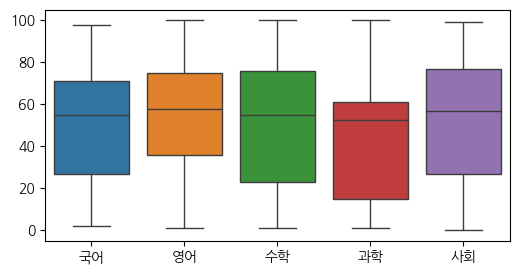

In [ ]:
# df로 결측치/이상치 처리 결과
df = MakeScores.preprocessing(df)

In [ ]:
df.describe()

,국어,영어,수학,과학,사회,학년,성별
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,51.049315,52.958904,50.904110,43.049315,52.608219,1.972603,0.616438
std,26.439575,27.256721,29.509021,27.635922,27.640880,0.781249,0.489618
min,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,27.000000,36.000000,23.000000,15.000000,27.000000,1.000000,0.000000
50%,55.100000,58.000000,55.000000,52.600000,56.800000,2.000000,1.000000
75%,71.000000,75.000000,76.000000,61.000000,77.000000,3.000000,1.000000
max,98.000000,100.000000,100.000000,100.000000,99.000000,3.000000,1.000000


In [ ]:
df_save = df.copy()
df = df_save

# 점수 값을 분류형 데이터로 바꿈
def assign_single_group(score):
    if score > 80:
        return 3  # 우수
    elif score > 60:
        return 2  # 보통
    else:
        return 1  # 미흡

# 모든 점수 값에 그룹 할당
for col in df.iloc[:,0:5].columns:
    df[col] = df[col].apply(assign_single_group)

df

,국어,영어,수학,과학,사회,학년,성별
학생2,2,1,1,1,1,3,1
학생3,1,2,1,1,1,2,1
학생4,3,1,1,1,1,2,1
학생5,1,1,1,1,1,1,0
학생6,1,2,1,2,2,2,1
...,...,...,...,...,...,...,...
학생94,1,1,1,2,1,3,0
학생95,1,3,1,1,1,1,0
학생96,1,1,1,1,2,2,1
학생97,2,1,1,2,1,1,0


In [ ]:
# 여 1, 남 0
df_grouped_sex = df.groupby('성별').mean().round(1)
df_grouped_sex

,국어,영어,수학,과학,사회,학년
성별,,,,,,
0,1.5,1.8,1.5,1.5,1.6,1.9
1,1.5,1.5,1.6,1.3,1.5,2.0


## 2번 문제: 가상 데이터셋을 생성한 뒤, 데이터셋을 학습, 검증, 테스트 데이터셋으로 분할해보세요.

In [ ]:
print(df.info())
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, 학생2 to 학생100
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   국어      73 non-null     int64
 1   영어      73 non-null     int64
 2   수학      73 non-null     int64
 3   과학      73 non-null     int64
 4   사회      73 non-null     int64
 5   학년      73 non-null     int64
 6   성별      73 non-null     int64
dtypes: int64(7)
memory usage: 6.6+ KB
None


(73, 7)

In [ ]:
from sklearn.model_selection import train_test_split
y= df["성별"]
X= df.drop(["성별", "학년"], axis=1)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=119)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=119)
print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(43, 5) (15, 5) (15, 5)
(43,) (15,) (15,)


### 3번 문제: 간단한 이진 분류 문제를 k-최근접이웃 알고리즘을 사용해 해결해보세요.

In [ ]:
X_train.head()

,국어,영어,수학,과학,사회
학생16,1,3,1,1,1
학생69,3,3,2,1,1
학생83,1,2,1,1,1
학생29,3,1,1,1,3
학생45,2,2,1,1,2


In [ ]:
import numpy as np
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, 학생2 to 학생100
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   국어      73 non-null     int64
 1   영어      73 non-null     int64
 2   수학      73 non-null     int64
 3   과학      73 non-null     int64
 4   사회      73 non-null     int64
 5   학년      73 non-null     int64
 6   성별      73 non-null     int64
dtypes: int64(7)
memory usage: 6.6+ KB


In [ ]:
# k 최근접 알고리즘 모델 / # 학습 데이터셋으로 모델 학습
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, y_train)

# 예측
y_pred = knn_model.predict(X_test)
print("정답:", y_test.values)
print("예측:", y_pred)

# 모델 평가 (정확도 계산)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

정답: [0 0 0 1 1 1 0 1 0 1 1 1 0 1 1]
예측: [1 1 0 0 1 0 0 1 0 1 0 1 0 1 1]
Accuracy: 0.6666666666666666
